<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1-Подготовка-окружения">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Подготовка окружения
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2-Подготовка-данных">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#2.1-Загрузка-данных">
                            <span class="toc-item-num">2.1&nbsp;&nbsp;</span>
                            Загрузка данных
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.2-Разделение-на-выборки">
                            <span class="toc-item-num">2.2&nbsp;&nbsp;</span>
                            Разделение на выборки
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#3-DecisionTreeClassifier">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>
                    DecisionTreeClassifier
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#4-Общий-вывод">
                    <span class="toc-item-num">4&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №2: Деревья решений

**Задача:** применить метод DecisionTreeClassifier.

**Источники данных:** `sklearn.datasets.make_classification()`.

**Описание данных:** сгенерированный набор данных с 5 классами.

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 1 Подготовка окружения

Импорт необходимых библиотек:

In [1]:
import pandas as pd

from tqdm.notebook import tqdm

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from utils.plot_charts import plot_class, plot_corr, create_decision_regions_gif

Скрытие предупреждений:

In [2]:
import warnings
warnings.filterwarnings('ignore')

Фиксация случайных величин:

In [3]:
SEED = 42

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 2 Подготовка данных

### 2.1 Загрузка данных

Формирование многоклассового набора данных:

In [4]:
X, Y = make_classification(
    n_samples=1000, 
    n_features=5, 
    n_informative=4, 
    n_classes=5, # lab case
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=SEED
)

Формирование датафрейма из набора данных:

In [5]:
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['class'] = pd.Series(Y)

Выведение на экран первых пяти строк набора данных:

In [6]:
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  class
0   0.408996   0.661415  -0.897567  -1.555497  -0.904534      0
1   1.327643   1.432874   0.513679   0.297825  -1.866038      4
2  -0.732133  -2.353074  -0.558209  -0.710792  -0.377599      0
3  -3.348879  -0.881846   1.796324  -0.055609  -0.680817      0
4   0.204606   0.334694  -0.007583  -0.981608  -2.019593      1

Построение условного графика, демонстрирующего количество классов:

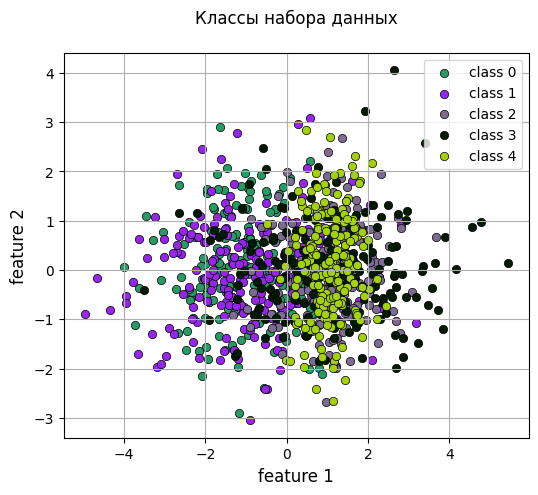

In [7]:
plot_class(data, 'Классы набора данных')

>Классы наслаиваются друг на друга.

Выведение на экран матрицы корреляции признаков набора данных:

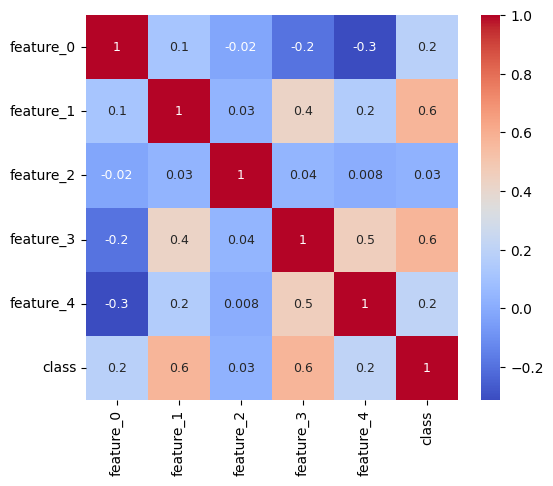

In [8]:
plot_corr(data)

>Заметно наличие корреляции между некоторыми признаками и целевым признаком.

---

### 2.2 Разделение на выборки

Разделение набора данных на тренировочную и тестовую выборки:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

Выведение на экран размерностей выборок:

In [10]:
print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Train set shape: (750, 5)
Test set shape: (250, 5)


<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 3 DecisionTreeClassifier

**Решающие деревья** - предсказывают значение целевой переменной с помощью применения последовательности простых решающих правил (предикатов).

**Достоинства:**

* Предсказания вычисляются довольно просто, из-за чего решающие деревья часто используют как основу для построения ансамблей.

>**Ансамбли** - модели, делающие предсказания на основе агрегации предсказаний других моделей.

**Недостаки:**

* Невсысокая обобщающая способность.

---

Сохранение моделей обучения:

In [11]:
models_dtc = []

for max_depth in range(10, 21):
    for a in range(1, 3):
        for b in range(1, 3):
            for c in range(1, 3):
                for d in range(1, 3):
                    for e in range(1, 3):
                        
                        model = DecisionTreeClassifier(
                            max_depth=max_depth, 
                            class_weight={0:a, 1:b, 2:c, 3:d, 4:e},
                            random_state=SEED
                        )

                        model.fit(X_train, y_train)
                        models_dtc.append(model)

Выведение на экран этапов классификации в зависимости от количества соседей:

Process:   0%|          | 0/352 [00:00<?, ?it/s]

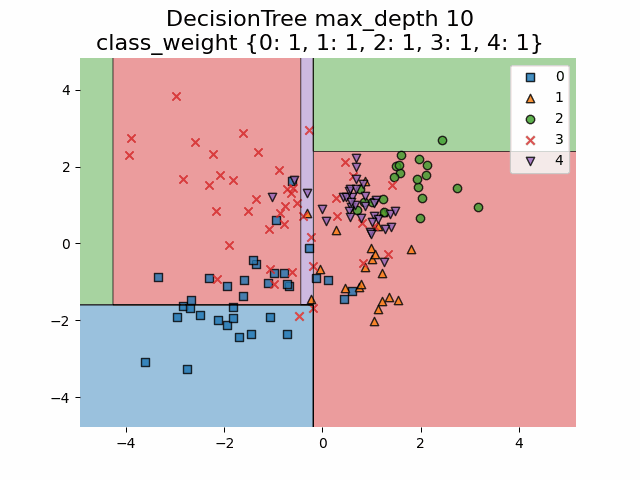

In [12]:
create_decision_regions_gif(
    models=models_dtc, 
    X=X_test, 
    Y=y_test, 
    title='DecisionTree', 
    params=['max_depth', 'class_weight']
)

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 4 Общий вывод

С помощью дерева решений была продемонстрирована классификация объектов многоклассовой выборки.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        В начало файла ↑
    </a>
</div>